In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
from scipy import stats
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/corrmap'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [6]:
corr_pyfr_df = pd.DataFrame()
corr_pyfr_df['Subject'] = pyFR_df['Subject']
corr_pyfr_df['within'] = plot.r2z(pyFR_df['within'])
corr_pyfr_df['across'] = plot.r2z(pyFR_df['across'])
corr_pyfr_df['R'] = pyFR_df['R']


In [7]:
pyFR_df.shape

(4168, 14)

In [8]:
plot.z2r(corr_pyfr_df['across'].mean())

0.5172976942997645

In [41]:
plot.z2r(corr_pyfr_df['within'].mean())

0.3195398880277972

In [9]:
pyFR_df.head()

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (hrs),Total electrodes,Proportion thresholded,Average session length (h)
0,0.844742,0.639768,31,[-63.64 -21.93 5.37],250.0,3465000,10,7.0,42,3.850,0.550,52,0.808,0.550
1,0.861268,0.640264,8,[-48.48 38.4 17.26],250.0,1549237,121,2.0,2,1.721,0.860,123,0.016,0.860
2,0.665390,0.519857,13,[ 49.49 -34.7 35.17],250.0,2454000,44,4.0,79,2.727,0.682,123,0.642,0.682
3,0.641038,0.445575,52,[ 65.66 -67.29 25.83],250.0,3600000,82,2.0,16,4.000,2.000,98,0.163,2.000
4,0.764453,0.504416,25,[-36.36 -1.81 59.76],250.0,447750,98,1.0,2,0.498,0.498,100,0.020,0.498


## Across vs within subject analysis

one sided t test for across: 
Ttest_1sampResult(statistic=25.088161283404638, pvalue=1.8297349204895617e-35)
one sided t test for within: 
Ttest_1sampResult(statistic=15.164007029738844, pvalue=3.454505437136251e-23)
t test: 
Ttest_relResult(statistic=9.626281047641262, pvalue=3.4033996276768177e-14)


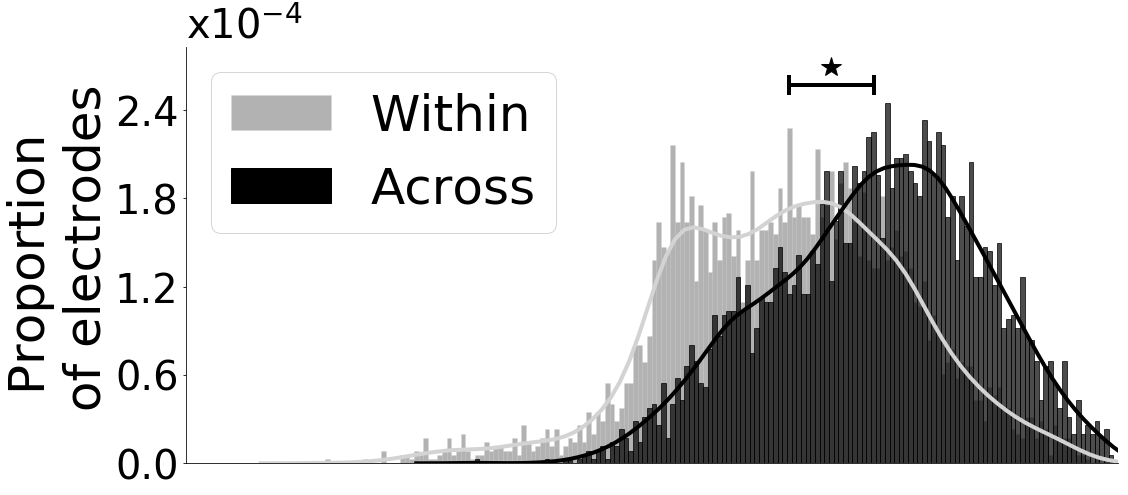

In [10]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_2_histograms(corr_pyfr_df, 'within', 'across', xticks=False, outfile=outfile) 
plt.show()

In [11]:
pyfr_locs = plot.compile_df_locs(pyFR_df['R'])
corr_pyfr_locs = np.atleast_2d(pyFR_df['across'])

In [12]:
grouped_results = corr_pyfr_df.groupby('Subject')['within', 'across'].mean()
t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])

In [13]:
t_stat_group

Ttest_relResult(statistic=9.626281047641262, pvalue=3.4033996276768177e-14)

In [14]:
grouped_results.shape

(67, 2)

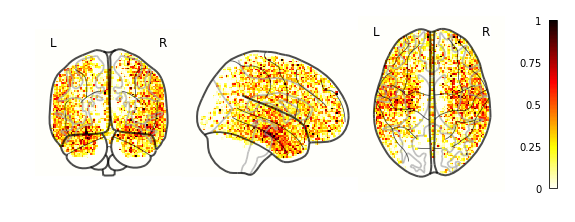

In [15]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(pyfr_locs,  np.atleast_2d(corr_pyfr_locs), width=2, vox_size=2, outfile=outfile)

# RAM

In [16]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [43]:
RAM_df.shape

(3159, 20)

In [17]:
all_subject = np.array([])
all_within = np.array([])
all_across = np.array([])
all_R = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject = np.append(all_subject, item)
    all_within = np.append(all_within, RAM_df['W_w_w'].iloc[i])
    all_across = np.append(all_across, RAM_df['W_a_w'].iloc[i])
    all_R = np.append(all_R, RAM_df['R'].iloc[i])

In [18]:
corr_all_df = pd.DataFrame()
corr_all_df['Subject'] = all_subject
corr_all_df['W_w_w'] = plot.r2z(all_within)
corr_all_df['W_a_w'] = plot.r2z(all_across)
corr_all_df['R'] = all_R

In [19]:
plot.z2r(corr_all_df['W_a_w'].mean())

0.6814183001347242

In [20]:
plot.z2r(corr_all_df['W_w_w'].mean())

0.21624048394696144

one sided t test for across: 
Ttest_1sampResult(statistic=9.748726184885673, pvalue=1.2329279252356298e-09)
one sided t test for within: 
Ttest_1sampResult(statistic=7.8805823231258865, pvalue=5.5464344409257696e-08)
t test: 
Ttest_relResult(statistic=6.930163974276389, pvalue=4.5901965099743084e-07)


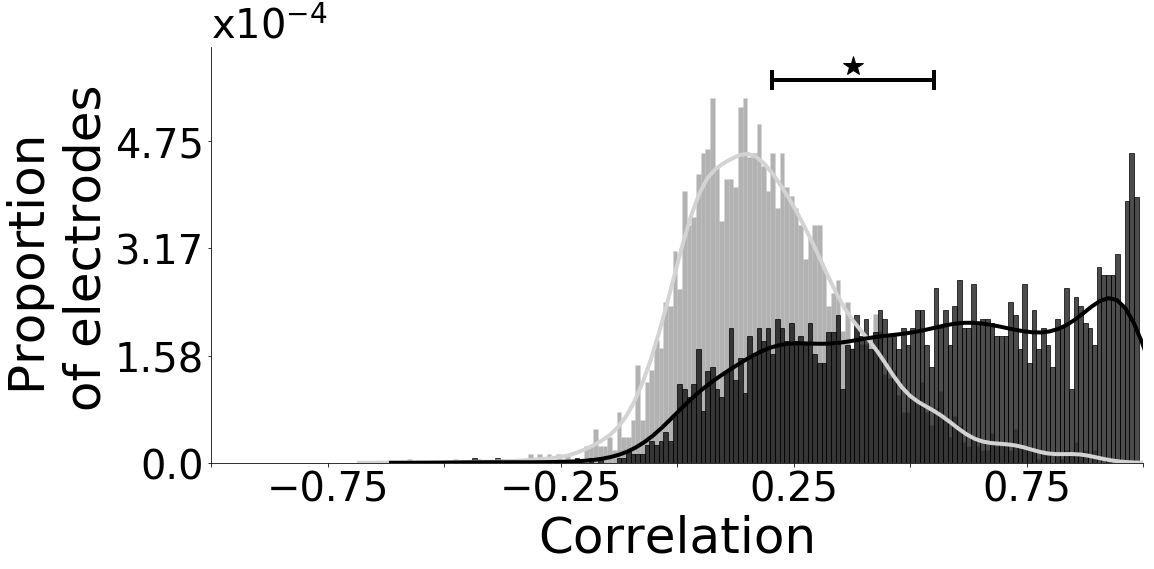

In [21]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_all_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 

In [22]:
all_locs = plot.compile_df_locs(RAM_df['R'])
corr_all_locs = np.atleast_2d(RAM_df['W_a_w'])

In [23]:
grouped_results = corr_all_df.groupby('Subject')['W_w_w', 'W_a_w'].mean()
t_stat_group = stats.ttest_rel(grouped_results['W_a_w'],grouped_results['W_w_w'])

In [24]:
grouped_results.head()

,W_w_w,W_a_w
Subject,,
0.0,0.219335,0.824195
1.0,0.086401,0.505154
2.0,0.091786,1.185209
3.0,0.089896,0.607879
4.0,0.412031,1.435772


In [25]:
t_stat_group

Ttest_relResult(statistic=6.930163974276389, pvalue=4.5901965099743084e-07)

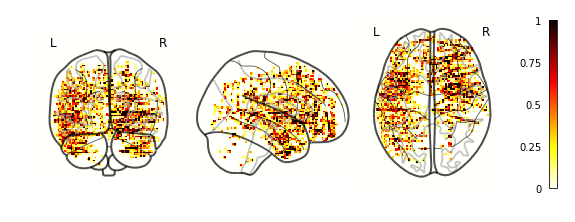

In [26]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(all_locs,  np.atleast_2d(corr_all_locs), width=2, vox_size=2, outfile=outfile)

## FR

In [27]:
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [28]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [29]:
FR_df.head()

,R,W_a_a,Subject,Electrode,Sample rate,Samples,Total Electrodes,Sessions,Number thresholded,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w,Thresholded electrodes,Total time (h),Average session length (h),Total electrodes,Proportion thresholded,Experiment
4,[-54.86 15.87 40.38],0.024989,0,3,250.0,668750,85,1.0,19,0.426785,0.232029,0.187670,0.312530,0.378536,85,0.743,0.743,104,0.183,RAM_FR1
5,[-38.79 51.43 47.05],0.049455,0,0,250.0,668750,85,1.0,19,0.191558,0.514627,0.113440,0.072644,0.461210,85,0.743,0.743,104,0.183,RAM_FR1
6,[-52.44 24.4 43.61],0.104537,0,2,250.0,668750,85,1.0,19,0.294488,0.303376,0.284694,0.395410,0.345201,85,0.743,0.743,104,0.183,RAM_FR1
11,[-48.86 33.3 45.33],0.007091,0,1,250.0,668750,85,1.0,19,0.053449,0.135901,0.149836,0.200228,0.300453,85,0.743,0.743,104,0.183,RAM_FR1
12,[-57.67 6.22 38.01],0.384874,0,4,250.0,668750,85,1.0,19,0.506324,0.200728,0.049354,0.187545,0.354749,85,0.743,0.743,104,0.183,RAM_FR1


In [30]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    fr_subject = np.append(fr_subject, item)
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [31]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

one sided t test for across: 
Ttest_1sampResult(statistic=8.399336166572201, pvalue=1.8410073037611364e-08)
one sided t test for within: 
Ttest_1sampResult(statistic=8.709643386673946, pvalue=9.682191439179502e-09)
t test: 
Ttest_relResult(statistic=6.2352486121116755, pvalue=2.315676140498605e-06)


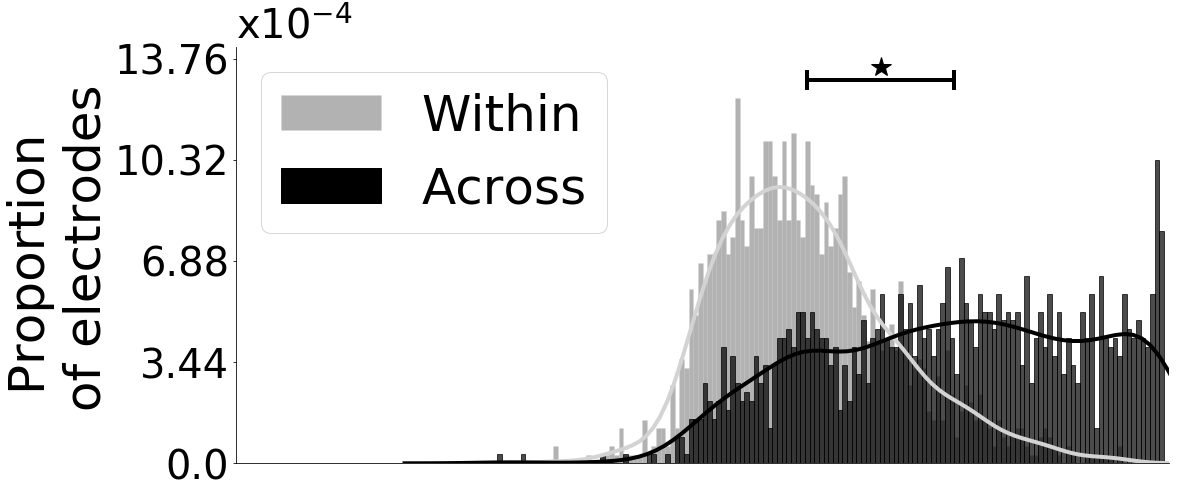

In [32]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_fr_df, 'W_w_w', 'W_a_w', xticks=False, outfile=outfile) 

In [33]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

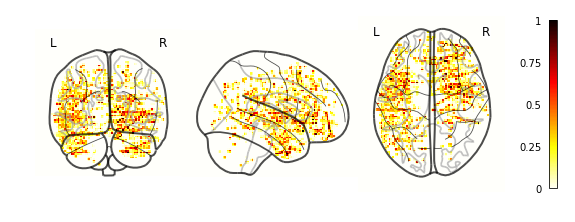

In [34]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(fr_locs, np.atleast_2d(fr_across), width=2, vox_size=2, outfile=outfile)

## CatFR

In [35]:
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [36]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    catfr_subject = np.append(catfr_subject, item)
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [37]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

one sided t test for across: 
Ttest_1sampResult(statistic=9.744681768621069, pvalue=1.2425286882148373e-09)
one sided t test for within: 
Ttest_1sampResult(statistic=6.161811916669198, pvalue=2.756821235045249e-06)
t test: 
Ttest_relResult(statistic=6.6503478192699195, pvalue=8.744870451395446e-07)


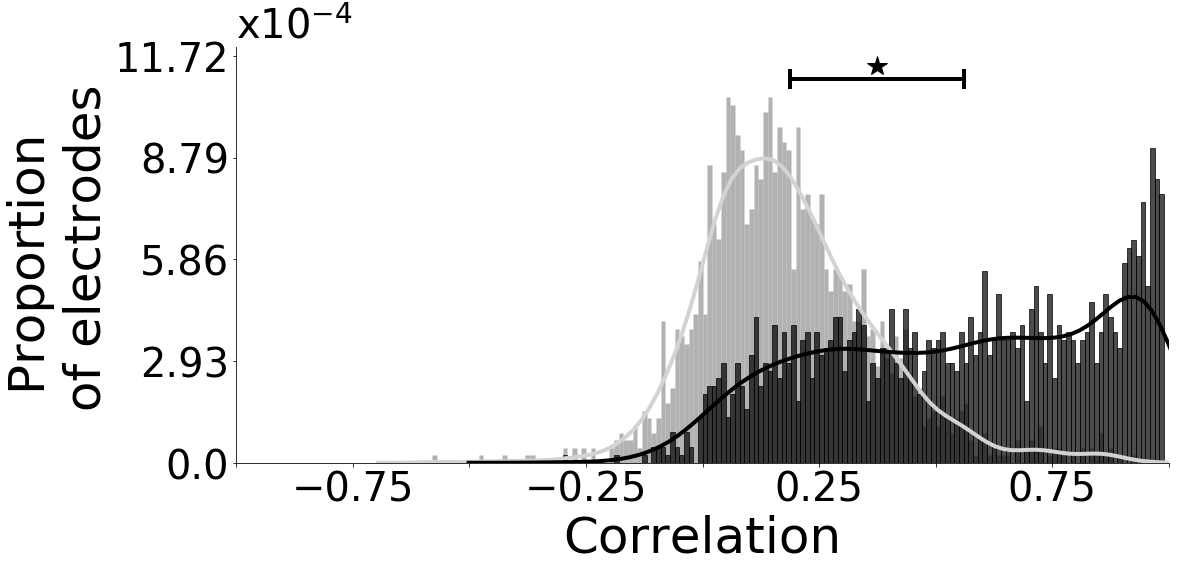

In [38]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

plt.show()
plot.plot_2_histograms(corr_catfr_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 

In [39]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

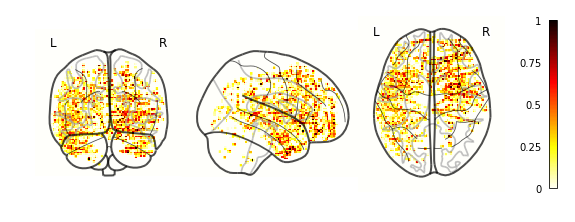

In [40]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.interp_corr_old(catfr_locs, np.atleast_2d(catfr_across), width=2, vox_size=2, outfile=outfile)